In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
df = pd.read_csv('./exam.csv')
df.dropna
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
x=df["reading score"].values
x

array([ 72,  90,  95,  57,  78,  83,  95,  43,  64,  60,  54,  52,  81,
        72,  53,  75,  89,  32,  42,  58,  69,  75,  54,  73,  71,  74,
        54,  69,  70,  70,  74,  65,  72,  42,  87,  81,  81,  64,  90,
        56,  61,  73,  58,  65,  56,  54,  65,  71,  74,  84,  55,  69,
        44,  78,  84,  41,  85,  55,  59,  17,  74,  39,  61,  80,  58,
        64,  37,  72,  58,  64,  63,  55,  51,  57,  49,  41,  26,  78,
        74,  68,  49,  45,  47,  64,  39,  80,  83,  71,  70,  86,  72,
        34,  79,  45,  86,  81,  66,  72,  67,  67,  67,  74,  91,  44,
        86,  67, 100,  63,  76,  64,  89,  55,  53,  58, 100,  77,  85,
        82,  63,  69,  92,  89,  93,  57,  80,  95,  68,  77,  82,  49,
        84,  37,  74,  81,  79,  55,  54,  55,  66,  61,  72,  62,  55,
        43,  73,  39,  84,  68,  75, 100,  67,  67,  70,  49,  67,  89,
        74,  60,  86,  62,  78,  88,  53,  53,  92, 100,  51,  76,  83,
        75,  73,  88,  86,  67,  51,  91,  54,  77,  70, 100,  6

In [6]:
y=df["writing score"].values
y

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  78,  86,  28,  46,  61,  63,  70,  53,  73,  80,  72,
        55,  75,  65,  75,  74,  61,  65,  38,  82,  79,  83,  59,  88,
        57,  54,  68,  65,  66,  54,  57,  62,  76,  76,  82,  48,  68,
        42,  75,  87,  43,  86,  49,  58,  10,  72,  34,  55,  71,  59,
        61,  37,  74,  56,  57,  73,  63,  48,  56,  41,  38,  22,  81,
        72,  68,  50,  45,  54,  63,  34,  82,  88,  74,  67,  82,  74,
        36,  71,  50,  92,  82,  62,  70,  62,  62,  67,  74,  89,  47,
        90,  72, 100,  64,  70,  72,  98,  49,  47,  54, 100,  74,  82,
        79,  61,  65,  89,  92,  93,  56,  73,  86,  67,  74,  74,  51,
        82,  40,  70,  84,  75,  48,  41,  56,  67,  69,  71,  64,  54,
        47,  78,  33,  75,  66,  81,  93,  69,  68,  66,  47,  61,  88,
        78,  60,  87,  64,  74,  85,  52,  49,  91, 100,  51,  78,  78,
        70,  74,  78,  81,  70,  54,  87,  58,  77,  62, 100,  7

In [7]:
x=x.reshape(-1,1)
x

array([[ 72],
       [ 90],
       [ 95],
       [ 57],
       [ 78],
       [ 83],
       [ 95],
       [ 43],
       [ 64],
       [ 60],
       [ 54],
       [ 52],
       [ 81],
       [ 72],
       [ 53],
       [ 75],
       [ 89],
       [ 32],
       [ 42],
       [ 58],
       [ 69],
       [ 75],
       [ 54],
       [ 73],
       [ 71],
       [ 74],
       [ 54],
       [ 69],
       [ 70],
       [ 70],
       [ 74],
       [ 65],
       [ 72],
       [ 42],
       [ 87],
       [ 81],
       [ 81],
       [ 64],
       [ 90],
       [ 56],
       [ 61],
       [ 73],
       [ 58],
       [ 65],
       [ 56],
       [ 54],
       [ 65],
       [ 71],
       [ 74],
       [ 84],
       [ 55],
       [ 69],
       [ 44],
       [ 78],
       [ 84],
       [ 41],
       [ 85],
       [ 55],
       [ 59],
       [ 17],
       [ 74],
       [ 39],
       [ 61],
       [ 80],
       [ 58],
       [ 64],
       [ 37],
       [ 72],
       [ 58],
       [ 64],
       [ 63],
      

In [16]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 20)
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict


array([83.7868472 , 62.00346054, 59.03299872, 66.95423024, 48.14130539,
       64.97392236, 82.79669326, 75.86561569, 62.99361448, 55.07238297,
       62.99361448, 40.22007388, 68.93453811, 66.95423024, 69.92469205,
       80.81638538, 53.09207509, 67.94438417, 85.76715508, 60.02315266,
       79.82623145, 66.95423024, 65.9640763 , 57.05269084, 72.89515387,
       66.95423024, 61.0133066 , 44.18068963, 55.07238297, 68.93453811,
       66.95423024, 74.87546175, 76.85576963, 69.92469205, 76.85576963,
       97.64900235, 52.10192115, 57.05269084, 51.11176721, 57.05269084,
       59.03299872, 90.71792478, 65.9640763 , 73.88530781, 98.63915629,
       73.88530781, 82.79669326, 73.88530781, 56.0625369 , 62.99361448,
       91.70807872, 66.95423024, 84.77700114, 58.04284478, 42.20038176,
       82.79669326, 63.98376842, 95.66869447, 97.64900235, 70.91484599,
       33.2889963 , 58.04284478, 80.81638538, 62.99361448, 52.10192115,
       89.72777084, 73.88530781, 72.89515387, 63.98376842, 62.00

In [9]:
print(f"Accuracy of trained data {model.score(x_train,y_train)*100} %")
print(f"Accuracy of tested data {model.score(x_test,y_test)*100} %")

Train accuracy 91.43189151043548 %
Test accuracy 90.41445471841027 %


In [10]:

score = model.score(x_test,y_test)
score*100

90.41445471841027

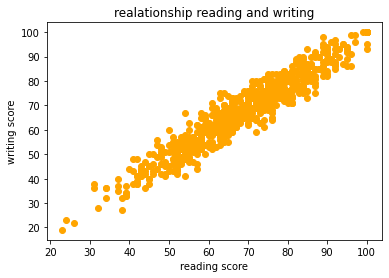

In [11]:
plt.scatter(x_train,y_train,color='orange')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.title('realationship reading and writing')
plt.show()

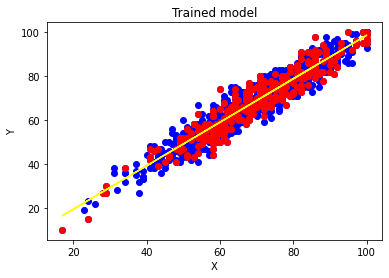

In [12]:
plt.scatter(x,y,color = "blue")
plt.scatter(x_test,y_test,color='red')
plt.plot(x,model.predict(x), color = "yellow")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Trained model")
plt.show()

<AxesSubplot:>

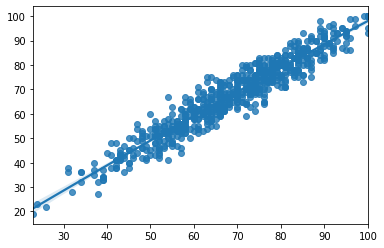

In [13]:
sns.regplot(x=x_train, y=y_train, order=2)